# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/PointNetTest


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [6]:
#読み込むデータのパスの設定

data_path = '/mnt/MachineLearning/data'
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

input_list

['/mnt/MachineLearning/data/office1/inputdata.csv',
 '/mnt/MachineLearning/data/office10/inputdata.csv',
 '/mnt/MachineLearning/data/office15/inputdata.csv',
 '/mnt/MachineLearning/data/office16/inputdata.csv',
 '/mnt/MachineLearning/data/office2/inputdata.csv',
 '/mnt/MachineLearning/data/office22/inputdata.csv',
 '/mnt/MachineLearning/data/office28/inputdata.csv',
 '/mnt/MachineLearning/data/office3/inputdata.csv',
 '/mnt/MachineLearning/data/office7/inputdata.csv']

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

In [14]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_221015.csv")

df_summary

,casename,num_drop,volume[ml],RoI,aircon,ventilation,exhaust
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b
...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a


In [15]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,casename,num_drop,volume[ml],RoI,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,0,0,1
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,1,0,0
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,0,1,0
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,1,0,0
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,0,1,0
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,0,1,0
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,1,0,0
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,0,1,0
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,1,0,0


In [108]:
df_total = df_total.set_index('casename')

In [16]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [109]:
df_total.std(numeric_only=True)

num_drop       921.844114
volume[ml]       0.000017
RoI             36.376848
aircon         360.876287
ventilation     83.985694
exhaust_a        0.495869
exhaust_b        0.495869
exhaust_off      0.344132
dtype: float64

In [111]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
casename,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [112]:
df_total["RoI"]

casename
office2_0_0             204.224242
office2_0_164_aout      238.345455
office2_0_164_bout      183.327273
office2_0_246_aout      240.436364
office2_0_246_bout      232.181818
                           ...    
office3_960_164_bout    155.072727
office3_960_246_aout    134.181818
office3_960_246_bout    117.878788
office3_960_82_aout     158.218182
office3_960_82_bout     160.024242
Name: RoI, Length: 431, dtype: float64

In [21]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [22]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。
"""
officemodel_path = '/mnt/MachineLearning/OfficeModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

sampledPointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        

    pc_aircon = pc_dict[OfficePart.aircon]
    pc_airvent = pc_dict[OfficePart.airvent]
    pc_room = pc_dict[OfficePart.room]
    pc_base = np.concatenate([pc_aircon, pc_airvent, pc_room])
    num_sampling = NUM_POINTS - len(pc_base)

#     pc_forSampling = np.concatenate([pc_dict[OfficePart.body], pc_dict[OfficePart.desks]])
# #     pc_forSampling = pc_dict[OfficePart.desks]
#     print(f'#sampling {num_sampling} from {len(pc_forSampling)}', )
#     rand_list = random.sample(range(len(pc_forSampling)), k=num_sampling)
#     pc_sampled = pc_forSampling[rand_list, :]
    
    num_sampling_body = num_sampling // 2
    num_sampling_desks = num_sampling - num_sampling_body
    
    print("num_sampling_body = ", num_sampling_body)
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=num_sampling_body)
    pc_sampled_body = pc_body[rand_list, :]
    
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    
    
#     pointCloud = np.concatenate([pc_base, pc_sampled])
    pointCloud = np.concatenate([pc_base, pc_sampled_body, pc_sampled_desks])
    print(pointCloud.shape)
    sampledPointCloud_dict[officename] = pointCloud


['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']
OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room
OfficePart.desks
['/mnt/MachineLearning/OfficeModel/model_origin/case1/aircon/aircon_body.stl', '/mnt/MachineLearning/OfficeModel/model_origin/case1/aircon/aircon_inlets.stl', '/mnt/MachineLearning/OfficeModel/model_origin/case1/aircon/aircon_outlet.stl']
['/mnt/MachineLearning/OfficeModel/model_origin/case1/airvent/20210812_airvent_a.stl', '/mnt/MachineLearning/OfficeModel/model_origin/case1/airvent/airvent_b.stl']
['/mnt/MachineLearning/OfficeModel/model_origin/case1/body/20210810_bodies.stl']
['/mnt/MachineLearning/OfficeModel/model_origin/case1/room/20210810_office_bottom.stl', '/mnt/MachineLearnin

In [23]:
import numpy as np

pcFilePath = '/mnt/MachineLearning/OfficeModel/PointCloud_sampled/PointCloud_dict_test.npy'

# np.save(pcFilePath, sampledPointCloud_dict, allow_pickle='TRUE')

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
sampledPointCloud_dict = a.item()
sampledPointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

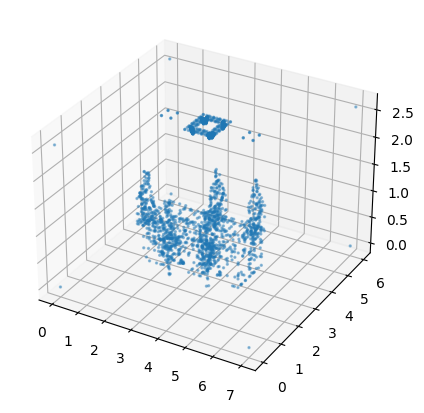

In [24]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(sampledPointCloud_dict['office10'])

In [25]:
import numpy as np
'''
点群シャッフルによるデータ増強
'''
rng = np.random.default_rng()

pointCloud_augumented_dict = {}
for office_name, pointCloud in sampledPointCloud_dict.items():
    pc_list = []
    for i in range(4):
        pc = pointCloud.copy()

        if i >= 1:
            #点群のシャッフル
            rng.shuffle(pc)

        pc_list.append(pc)

    pointCloud_augumented_dict[office_name] = pc_list

pointCloud_augumented_dict

{'office1': [array([[2.5     , 2.25    , 2.6     ],
         [2.5     , 2.375   , 2.6     ],
         [2.5     , 2.45    , 2.6     ],
         ...,
         [3.825   , 1.733333, 0.7     ],
         [0.925   , 2.875   , 0.05    ],
         [1.495   , 1.278333, 0.53    ]], dtype=float32),
  array([[5.035   , 2.38    , 0.6375  ],
         [1.615   , 3.278333, 0.48    ],
         [1.766667, 1.475   , 0.7     ],
         ...,
         [4.846286, 2.209839, 1.093952],
         [4.385   , 1.5     , 0.75    ],
         [3.417067, 3.05    , 2.583233]], dtype=float32),
  array([[1.280442 , 1.611554 , 0.196532 ],
         [3.065    , 3.278333 , 0.53     ],
         [2.015628 , 3.260922 , 1.154565 ],
         ...,
         [4.258333 , 1.55     , 0.2666667],
         [3.308333 , 2.175    , 0.7      ],
         [3.3      , 2.4      , 2.516167 ]], dtype=float32),
  array([[2.7      , 3.183833 , 2.583833 ],
         [2.275    , 2.441667 , 0.7      ],
         [2.035    , 3.435    , 0.96     ],
        

In [186]:
def get_augumented_dataset():
    '''
    点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
    '''
    case_index_list = list(df_total.index)
    # case_index_list = list(df_total["casename"])


    case_index_augumented_list = []

    pointCloudArray_list = []
    metaArray_list = []

    RoI_list = []

    for case_index in case_index_list:
        office_name = case_index.split('_', maxsplit=1)[0]
        pc_list = pointCloud_augumented_dict[office_name]
        for augumentID, pointCloud in enumerate(pc_list):
            case_index_augumented_list.append(case_index + '-' + str(augumentID))
            pointCloudArray_list.append(pointCloud)
            metaArray_list.append(df_meta_standardized.loc[case_index])
            RoI_list.append(df_total["RoI"].loc[case_index])

    case_index_array = np.array(case_index_augumented_list)
    metaArray = np.array(metaArray_list)
    RoIArray = np.array(RoI_list)

    pointCloudArray = np.array(pointCloudArray_list)
    
    return case_index_array, pointCloudArray, metaArray, RoIArray

X_index, X_pc, X_meta, y = get_augumented_dataset()

In [187]:
# print(X_pc.max())
# X_pc /= X_pc.max() #Normalization
# print(X_pc.max())


#Standardization
X_pc = ( X_pc - X_pc.std() ) / X_pc.std()

X_pc.std()

0.99999785

In [188]:
print(X_index.shape)

print(X_pc.shape, X_pc.mean(), X_pc.var())
print(X_meta.shape, X_meta.mean(), X_meta.var())

print(y.shape, y.mean(), y.var())

(1724,)
(1724, 2048, 3) 0.6333869 0.99999577
(1724, 5) 3.54447072362927e-17 0.9999999999999998
(1724,) 161.90224687039753 1320.2047924213653


In [189]:
X_index

array(['office2_0_0-0', 'office2_0_0-1', 'office2_0_0-2', ...,
       'office3_960_82_bout-1', 'office3_960_82_bout-2',
       'office3_960_82_bout-3'], dtype='<U23')

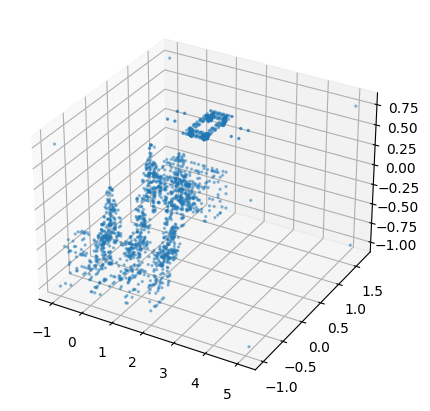

In [211]:
plot3d_points(X_pc[1000, :,:])

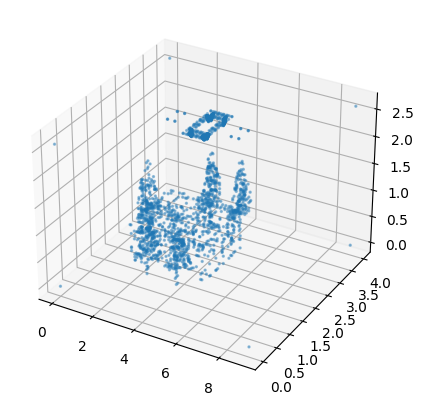

In [191]:
plot3d_points(sampledPointCloud_dict["office7"])

# チューニング

In [174]:
import random

def train_test_office_split(office_for_test:str, case_index_array, train_shuffle:bool):
    '''
    特定のofficeだけ、テスト用に分割。
    '''
    train_ID = []
    test_ID = []

    for (ID, case_index) in enumerate(case_index_array):
        if office_for_test+'_' in case_index:
            test_ID.append(ID) 
        else:
            train_ID.append(ID)
    
    if train_shuffle:
        random.shuffle(train_ID)
    
    return train_ID, test_ID

In [165]:
casename_list = list(df_total.index)

office_list = []

for casename in casename_list:
    officename = casename.split('_')[0]
    if officename not in office_list:
        office_list.append(officename)

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [166]:
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]

In [167]:
for test_office in test_office_list:
    print("test_office", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index)
    print(len(fit_ID), len(test_ID))
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    for val_office in val_office_list:
        print("val_office", val_office)
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit)
        print(len(train_ID), len(val_ID))
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
        y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
        print(X_index_fit[train_ID])


test_office office1
1568 156
val_office office7
1456 112
['office6_960_164_bout-2' 'office3_960_246_bout-1'
 'office3_660_246_bout-3' ... 'office3_0_82_aout-1'
 'office28_660_82_bout-3' 'office2_960_0-2']
val_office office10
1456 112
['office5_360_246_aout-3' 'office3_360_246_aout-1' 'office8_360_82_bout-3'
 ... 'office8_0_0-0' 'office14_960_82_bout-1' 'office7_0_0-1']
val_office office16
1456 112
['office4_660_164_bout-0' 'office4_960_246_aout-1'
 'office3_360_164_bout-1' ... 'office15_660_246_bout-0'
 'office9_660_164_bout-1' 'office15_660_82_bout-2']
val_office office22
1456 112
['office3_360_246_bout-3' 'office28_660_164_bout-1'
 'office2_660_246_aout-2' ... 'office14_960_164_bout-3'
 'office7_0_246_bout-3' 'office14_660_82_aout-2']
val_office office28
1456 112
['office5_0_164_aout-0' 'office15_660_82_aout-0' 'office15_660_82_aout-3'
 ... 'office8_360_246_bout-1' 'office7_960_82_aout-1'
 'office22_960_164_bout-3']
test_office office7
1612 112
val_office office1
1456 156
['office22_

In [32]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9744609729464431896
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9984212992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9923611088313648560
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-10-30 06:32:45.156686: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 06:32:45.642983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9521 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [ ]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [214]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/officeSplit_study--hp_momentum_bn.db'

NUM_POINTS = X_pc.shape[1]

def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    input_meta = keras.Input(shape=(X_meta.shape[1], ), name='meta')
    
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    hp_is_BatchNormalization_necessary = trial.suggest_categorical('is_BatchNormalization_necessary', [True, False])
    if hp_is_BatchNormalization_necessary:
        hp_momentum_bn = trial.suggest_categorical('momentum_bn', [0.0, 0.99])
        
    hp_is_HeNormalization_necessary = trial.suggest_categorical('is_HeNormalization_necessary', [True, False])
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        # x = conv_bn(x, hp_filters)
        
        if hp_is_HeNormalization_necessary:
            x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid", kernel_initializer="he_normal")(x)
        else:
            x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
            
        if hp_is_BatchNormalization_necessary:
            x = keras.layers.BatchNormalization(momentum=hp_momentum_bn)(x)
            
        x = keras.layers.ReLU()(x)
    
    features_pc = keras.layers.GlobalMaxPooling1D()(x)
    
    # hp_is_dense_bn_necessary = trial.suggest_categorical('is_dense_bn_necessary', [True, False])
    # if hp_is_dense_bn_necessary:
    #     hp_features = trial.suggest_int('features', 8, 64, step=8)
    #     features_pc = dense_bn(x, hp_features)
    # else:
    #     features_pc = x
    
    x = keras.layers.Concatenate()([features_pc, input_meta])
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    outputs = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=[input_pointCloud, input_meta], outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, X_index_fit, X_pc_fit, X_meta_fit, y_fit, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()

    mse_list = []
    
    for val_office in val_office_list:
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
        y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128, 256])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        model.fit(
            {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
            validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_list.append(evaluate[0]) #:MSE
        
    return np.mean(mse_list)


In [215]:
for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, X_index_fit, X_pc_fit, X_meta_fit, y_fit, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


[I 2022-11-16 08:24:37,622] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1


[I 2022-11-16 08:25:17,236] Trial 1 finished with value: 1763.7096008300782 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 64, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'lr': 0.09757478650784733, 'batch_size': 32}. Best is trial 1 with value: 1763.7096008300782.
[I 2022-11-16 08:26:47,882] Trial 2 finished with value: 871.864208984375 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 160, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'units-2': 512, 'units-3': 384, 'lr': 0.0006938640213647386, 'batch_size': 4}. Best is trial 2 with value: 871.864208984375.
[I 2022-11-16 08:28:19,691] Trial 3 finished with value: 910.6449615478516 and parameters: {'conv_layers': 2, 'is_Bat

test_office: office7


[I 2022-11-16 10:53:07,843] Trial 0 finished with value: 1435.2576538085937 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': True, 'filters-0': 256, 'filters-1': 256, 'filters-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 256, 'lr': 0.008282871120097719, 'batch_size': 16}. Best is trial 0 with value: 1435.2576538085937.
[I 2022-11-16 10:56:30,800] Trial 1 finished with value: 1669.544625854492 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': True, 'filters-0': 256, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 64, 'lr': 1.1051605424577973e-05, 'batch_size': 64}. Best is trial 0 with value: 1435.2576538085937.
[I 2022-11-16 10:56:57,975] Trial 2 finished with value: 1892.7897

test_office: office10


[I 2022-11-16 13:38:12,531] Trial 0 finished with value: 1065.2157348632813 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 192, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 0.0010248305722372003, 'batch_size': 64}. Best is trial 0 with value: 1065.2157348632813.
[I 2022-11-16 13:38:59,026] Trial 1 finished with value: 1389.9215728759766 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.0, 'is_HeNormalization_necessary': False, 'filters-0': 224, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.00973340761629779, 'batch_size': 32}. Best is trial 0 with value: 1065.2157348632813.
[I 2022-11-16 13:39:37,551] Trial 2 finished with value: 3333.733279418945 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_He

test_office: office16


[I 2022-11-16 16:21:41,424] Trial 0 finished with value: 2525.707568359375 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'lr': 0.00508975499877671, 'batch_size': 64}. Best is trial 0 with value: 2525.707568359375.
[I 2022-11-16 16:22:15,388] Trial 1 finished with value: 6078.361022949219 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 160, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'units-2': 384, 'units-3': 384, 'lr': 0.012336021003437446, 'batch_size': 256}. Best is trial 0 with value: 2525.707568359375.
[I 2022-11-16 16:22:56,939] Trial 2 finished with value: 4117.343310546875 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': False, 'is_HeNormali

test_office: office22


[I 2022-11-16 20:27:27,565] Trial 0 finished with value: 1658.6543212890624 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 192, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 0.0001451922336308372, 'batch_size': 32}. Best is trial 0 with value: 1658.6543212890624.
[I 2022-11-16 20:27:49,291] Trial 1 finished with value: 2587.426904296875 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 224, 'filters-1': 32, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 0.00032005852649562457, 'batch_size': 128}. Best is trial 0 with value: 1658.6543212890624.
[I 2022-11-16 20:28:36,358] Trial 2 finished with value: 1638.7619720458983 and parameters: {'conv_layers': 2, 'is_BatchNorm

KeyboardInterrupt: 

# チューニング結果確認

In [133]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

#     acc_df = history_df[["mae", "val_mae"]]
#     acc_df.plot()
#     plt.xlabel("epochs")
#     plt.ylabel("MeanAbsoluteError")
#     plt.show()

In [200]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    train_ID, val_ID = train_test_office_split(val_office_list[0], X_index_fit, train_shuffle=True)

    X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
    X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
    y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
        validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221116-072933
test_office: office1
<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f523f1635b0>>
Epoch 1/200
6/6 [==============================] - 3s 188ms/step - loss: 27193.0410 - mae: 160.6037 - val_loss: 30556.5918 - val_mae: 174.4468
Epoch 2/200
6/6 [==============================] - 1s 105ms/step - loss: 24053.0020 - mae: 150.2711 - val_loss: 30219.0527 - val_mae: 173.4764
Epoch 3/200
6/6 [==============================] - 1s 92ms/step - loss: 18856.4375 - mae: 131.4279 - val_loss: 29621.9316 - val_mae: 171.7466
Epoch 4/200
6/6 [==============================] - 1s 95ms/step - loss: 11184.4072 - mae: 97.0812 - val_loss: 28567.1914 - val_mae: 168.6470
Epoch 5/200
6/6 [==============================] - 1s 92ms/step - loss: 3690.7568 - mae: 51.1969 - val_loss: 27015.4238 - val_mae: 163.9809
Epoch 6/200
6/6 [==============================] - 1s 93ms/step - loss: 3513.5762 - mae: 45.4131 - val_loss: 26382.689

In [ ]:
%load_ext tensorboard

In [201]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 441.39521484375
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 1
    dense_layers: 3
    dropout: None
    filters-0: 128
    lr: 0.001484260873975492
    units-0: 192
    units-1: 256
    units-2: 256


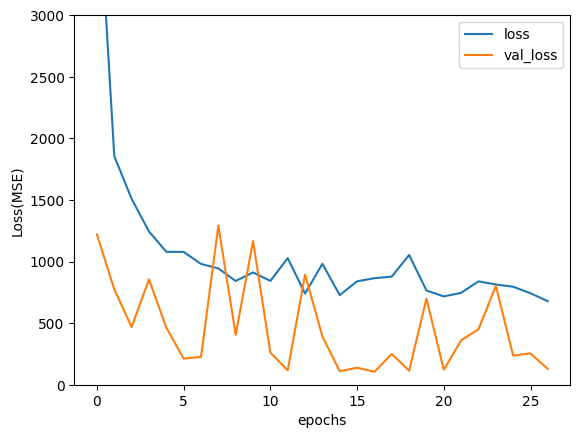

Best trial (test for office7):
  Value: 607.4539627075195
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 3
    dense_layers: 2
    dropout: None
    filters-0: 160
    filters-1: 128
    filters-2: 224
    lr: 0.00011465468388382681
    units-0: 128
    units-1: 320


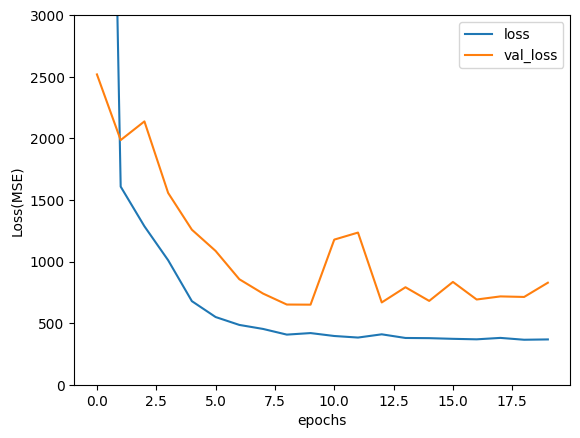

Best trial (test for office10):
  Value: 488.7784057617188
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters-0: 160
    lr: 0.0017008395833957928
    units-0: 512
    units-1: 192


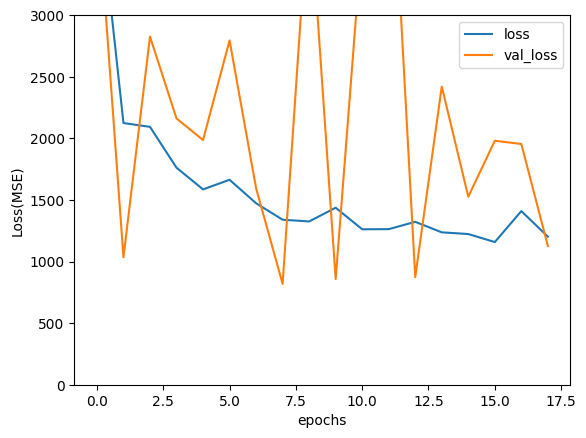

Best trial (test for office16):
  Value: 688.6282531738282
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 192
    filters-1: 160
    lr: 0.0003601297808170332
    units-0: 128
    units-1: 128


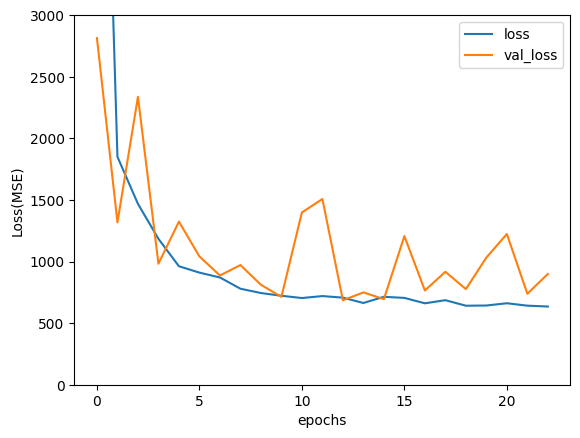

Best trial (test for office22):
  Value: 542.5590087890625
  Params: 
    batch_size: 16
    conv_layers: 1
    dense_layers: 0
    filters-0: 256
    lr: 0.0995425843758946


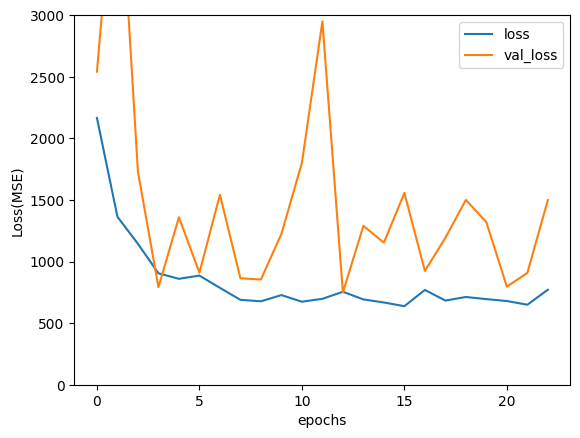

Best trial (test for office28):
  Value: 586.4444274902344
  Params: 
    activation: ReLU
    batch_size: 16
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters-0: 256
    lr: 0.0002858325888340114
    units-0: 320
    units-1: 256


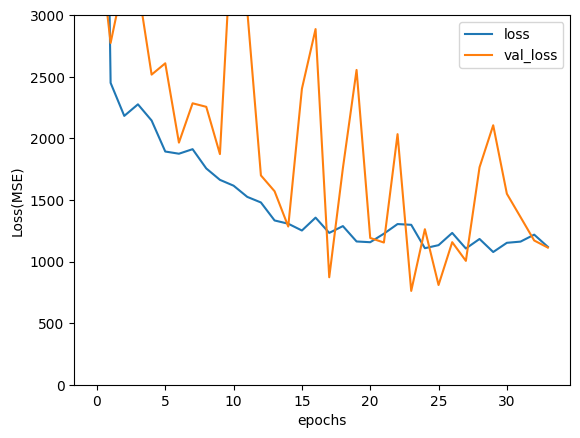

In [140]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history, ymax=3000.)

In [132]:
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index)
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
98/98 [==============================] - 1s 6ms/step - loss: 4126.6602 - mae: 48.1273 - val_loss: 2410.4724 - val_mae: 42.2218
Epoch 2/200
98/98 [==============================] - 0s 4ms/step - loss: 1746.8965 - mae: 33.6648 - val_loss: 945.2525 - val_mae: 25.5276
Epoch 3/200
98/98 [==============================] - 0s 5ms/step - loss: 1361.2460 - mae: 29.5836 - val_loss: 898.9619 - val_mae: 25.1996
Epoch 4/200
98/98 [==============================] - 0s 5ms/step - loss: 999.4071 - mae: 24.8719 - val_loss: 798.0635 - val_mae: 24.2556
Epoch 5/200
98/98 [==============================] - 0s 4ms/step - loss: 829.6368 - mae: 22.6788 - val_loss: 1570.3077 - val_mae: 31.8739
Epoch 6/200
98/98 [==============================] - 0s 4ms/step - loss: 756.5571 - mae: 21.4294 - val_loss: 1113.0717 - val_mae: 27.3523
Epoch 7/200
98/98 [==============================] - 0s 5ms/step - loss: 749.5933 - mae: 21.5557 - val_loss: 1575.5400 - val_mae: 31.9067
Epoch 8/200
9

Best trial (test for office1):
  Value: 441.39521484375
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 1
    dense_layers: 3
    dropout: None
    filters-0: 128
    lr: 0.001484260873975492
    units-0: 192
    units-1: 256
    units-2: 256


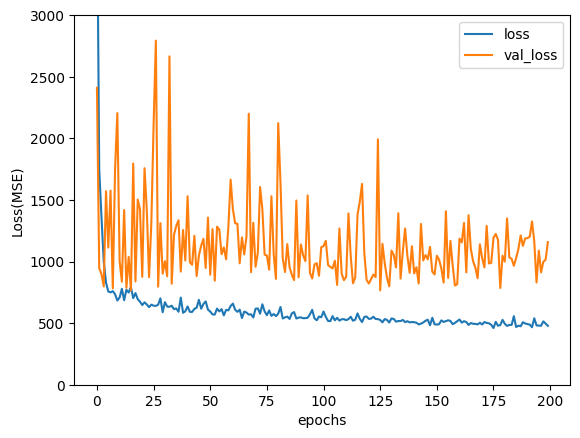

Best trial (test for office7):
  Value: 607.4539627075195
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 3
    dense_layers: 2
    dropout: None
    filters-0: 160
    filters-1: 128
    filters-2: 224
    lr: 0.00011465468388382681
    units-0: 128
    units-1: 320


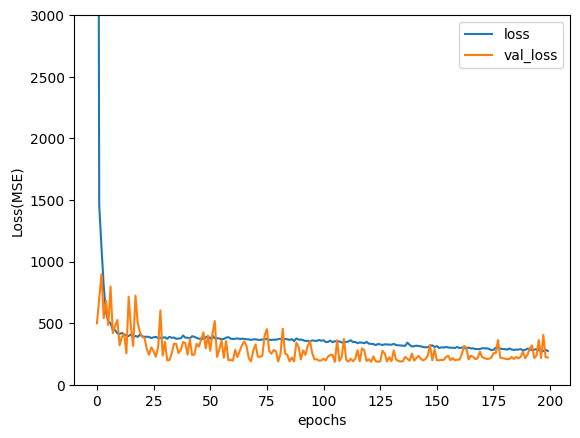

Best trial (test for office10):
  Value: 488.7784057617188
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters-0: 160
    lr: 0.0017008395833957928
    units-0: 512
    units-1: 192


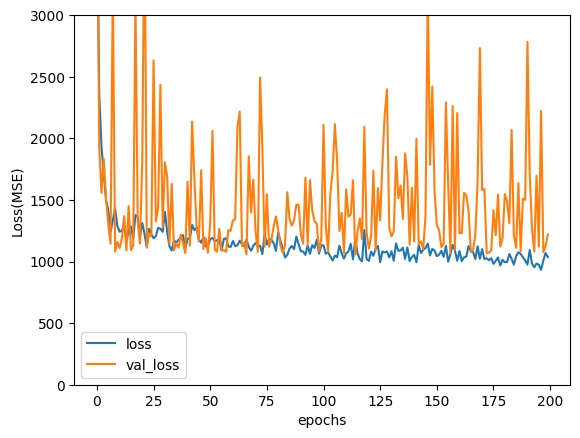

Best trial (test for office16):
  Value: 688.6282531738282
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 192
    filters-1: 160
    lr: 0.0003601297808170332
    units-0: 128
    units-1: 128


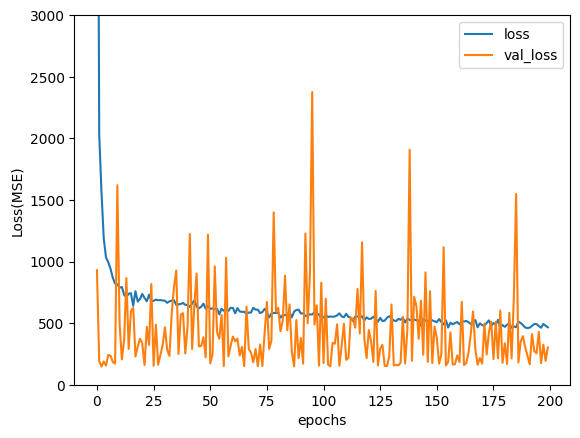

Best trial (test for office22):
  Value: 542.5590087890625
  Params: 
    batch_size: 16
    conv_layers: 1
    dense_layers: 0
    filters-0: 256
    lr: 0.0995425843758946


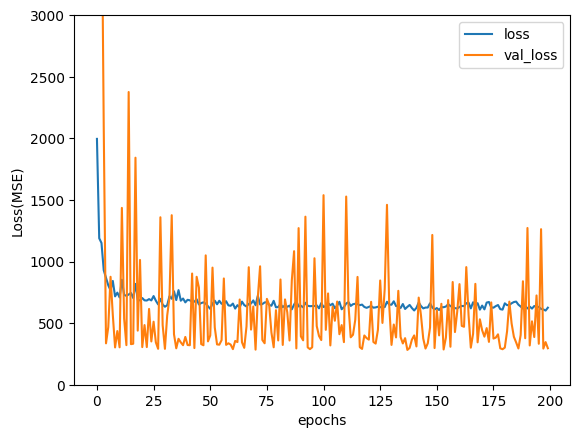

Best trial (test for office28):
  Value: 586.4444274902344
  Params: 
    activation: ReLU
    batch_size: 16
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters-0: 256
    lr: 0.0002858325888340114
    units-0: 320
    units-1: 256


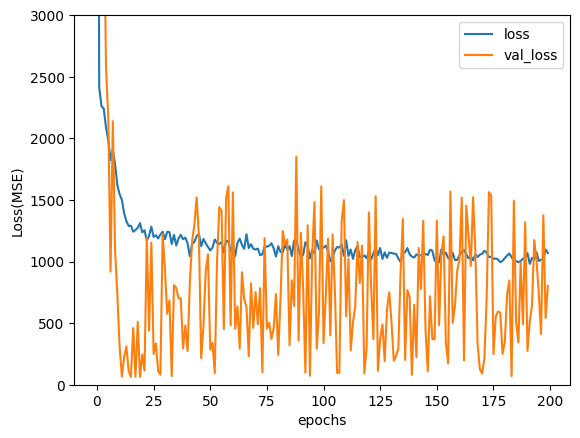

In [141]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True)
        
    plot_history(result_dict["history"].history, ymax=3000.)

In [178]:
db_path = '/mnt/MachineLearning/OptunaLog/officeSplit_study--batch_shuffle.db'

test_office = "office10"

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

# best_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1.e-5),
#     loss='mse',
#     metrics=['mae']
# )

fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
X_index_fit = X_index[fit_ID]

X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
y_fit, y_test = y[fit_ID], y[test_ID]

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

Epoch 1/200
7/7 [==============================] - 1s 76ms/step - loss: 24274.7324 - mae: 151.1248 - val_loss: 16183.7559 - val_mae: 123.2973
Epoch 2/200
7/7 [==============================] - 0s 46ms/step - loss: 7577.1084 - mae: 75.4036 - val_loss: 11159.0020 - val_mae: 100.8254
Epoch 3/200
7/7 [==============================] - 0s 55ms/step - loss: 3902.8201 - mae: 49.6840 - val_loss: 11201.4287 - val_mae: 101.0138
Epoch 4/200
7/7 [==============================] - 0s 50ms/step - loss: 2324.3662 - mae: 39.7494 - val_loss: 11377.0732 - val_mae: 101.8644
Epoch 5/200
7/7 [==============================] - 0s 51ms/step - loss: 2045.8497 - mae: 36.9383 - val_loss: 9879.1504 - val_mae: 94.1893
Epoch 6/200
7/7 [==============================] - 0s 50ms/step - loss: 1924.5459 - mae: 34.5654 - val_loss: 9718.2734 - val_mae: 93.3063
Epoch 7/200
7/7 [==============================] - 0s 48ms/step - loss: 1724.4675 - mae: 33.3373 - val_loss: 9890.2236 - val_mae: 94.2081
Epoch 8/200
7/7 [=======

In [184]:
print(f"Best trial (test for {test_office}):")

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

Best trial (test for office10):
  Value: 460.88736114501955
  Params: 
    activation: ELU
    batch_size: 256
    conv_layers: 1
    dense_layers: 4
    dropout: None
    filters-0: 256
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.0008236973302650423
    units-0: 320
    units-1: 64
    units-2: 192
    units-3: 448


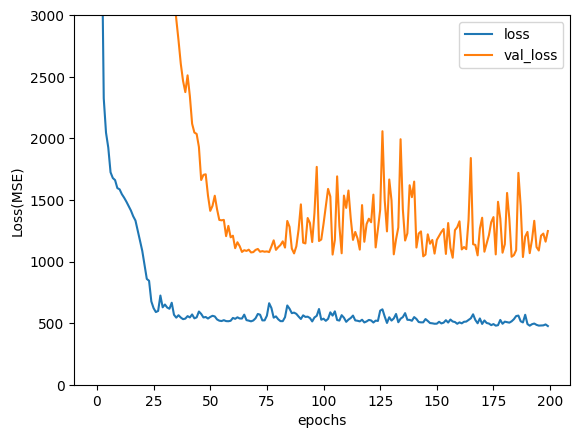

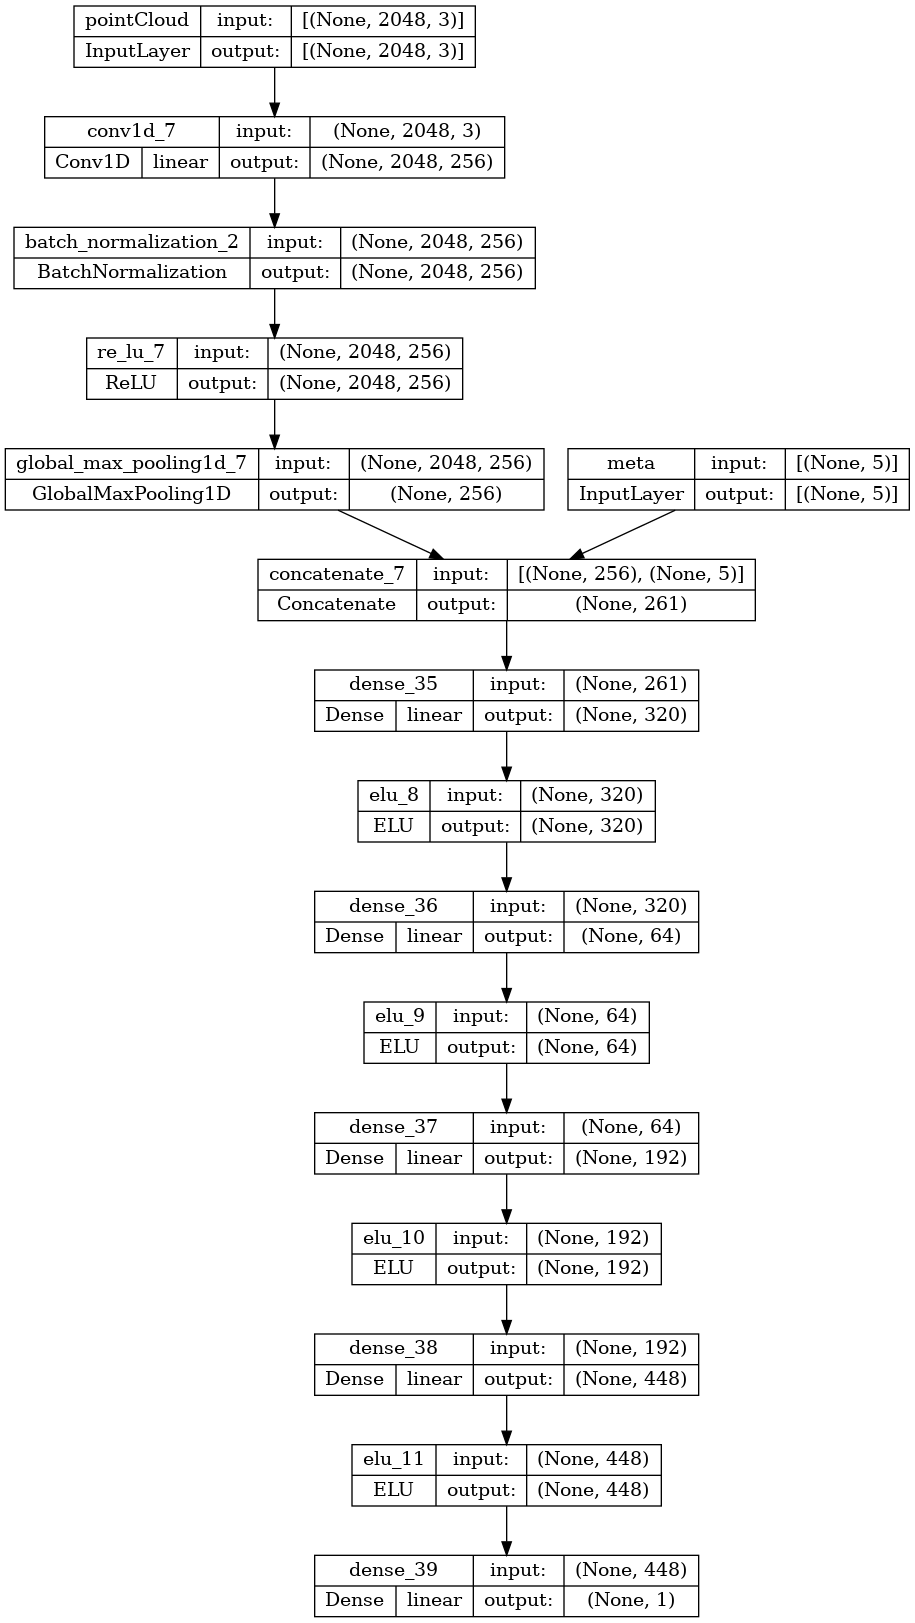

In [181]:
# plot_history(test_history.history)
plot_history(test_history.history, ymax=3000)

keras.utils.plot_model(best_model, show_shapes=True, show_layer_activations=True,)

In [ ]:
test_office = "office1"
result_dict = test_dict[test_office]

print(f"Best trial (test for {test_office}):")
best_trial = result_dict["best_trial"]

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True, show_layer_activations=True,)

In [79]:
import gc
 
gc.collect()

12558

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

best_model = total_model_builder(best_trial)

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)

best_history = best_model.fit(
    {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
    batch_size = 128,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
    callbacks=[estop]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

best_model = total_model_builder(best_trial)

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100)

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = 128,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    callbacks=[estop]
)